## Training LSTM model for stock price prediction

#### Data
To train the LSTM NASAQ data of AAPL, AMZN, IBM are taken

In [1]:
#Data file paths
AAPL_PATH = "/content/data/AAPL.csv"
AMZN_PATH = "/content/data/AMZN.csv"
IBM_PATH = "/content/data/IBM.csv"

### Loading data

In [2]:
from read_data import ReadStockData

# Loading stock data
appl_obj = ReadStockData(AAPL_PATH)
amzn_obj = ReadStockData(AMZN_PATH)
ibm_obj = ReadStockData(IBM_PATH)



Attempting to read the file at /content/data/AAPL.csv...
Data successfully read and filtered from /content/data/AAPL.csv
Attempting to read the file at /content/data/AMZN.csv...
Data successfully read and filtered from /content/data/AMZN.csv
Attempting to read the file at /content/data/IBM.csv...
Data successfully read and filtered from /content/data/IBM.csv


In [3]:
# Accessing the dataframe and printing first 5 rows
print("AAPL Data:")
print(appl_obj.df.head())

print("AMZN Data:")
print(amzn_obj.df.head())

print("IBM Data:")
print(ibm_obj.df.head())

AAPL Data:
                  Low       Open     Volume       High      Close  \
Date                                                                
2015-01-02  26.837500  27.847500  212818400  27.860001  27.332500   
2015-01-05  26.352501  27.072500  257142000  27.162500  26.562500   
2015-01-06  26.157499  26.635000  263188400  26.857500  26.565001   
2015-01-07  26.674999  26.799999  160423600  27.049999  26.937500   
2015-01-08  27.174999  27.307501  237458000  28.037500  27.972500   

            Adjusted Close  
Date                        
2015-01-02       24.603201  
2015-01-05       23.910093  
2015-01-06       23.912348  
2015-01-07       24.247646  
2015-01-08       25.179298  
AMZN Data:
                Low     Open    Volume     High    Close  Adjusted Close
Date                                                                    
2015-01-02  15.3480  15.6290  55664000  15.7375  15.4260         15.4260
2015-01-05  15.0425  15.3505  55484000  15.4190  15.1095         15.1095

In [4]:
df_AAPL = appl_obj.df
df_AMZN = amzn_obj.df
df_IBM = ibm_obj.df

In [5]:
df_AAPL.head()

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
2015-01-02,26.837500,27.847500,212818400,27.860001,27.332500,24.603201
2015-01-05,26.352501,27.072500,257142000,27.162500,26.562500,23.910093
2015-01-06,26.157499,26.635000,263188400,26.857500,26.565001,23.912348
2015-01-07,26.674999,26.799999,160423600,27.049999,26.937500,24.247646
2015-01-08,27.174999,27.307501,237458000,28.037500,27.972500,25.179298


### EDA


Performing EDA for AAPL...

Stock Data Insights:
Date Range: 2015-01-02 00:00:00 to 2022-12-12 00:00:00
Total Data Points: 2001
Mean Close Price: 72.64
Highest Close Price: 182.01 on 2022-01-03 00:00:00
Lowest Close Price: 22.58 on 2016-05-12 00:00:00
Volatility (Std Dev of Returns): 0.0189


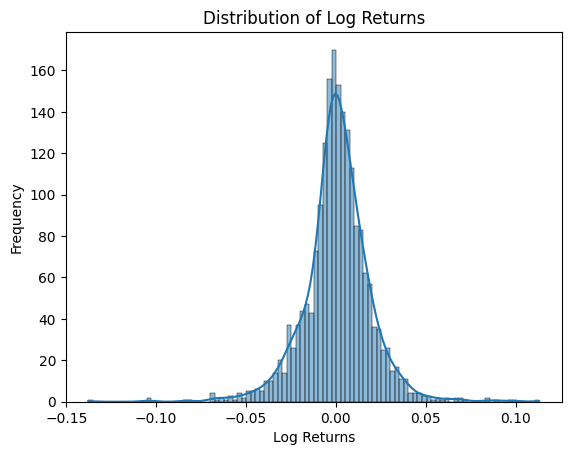

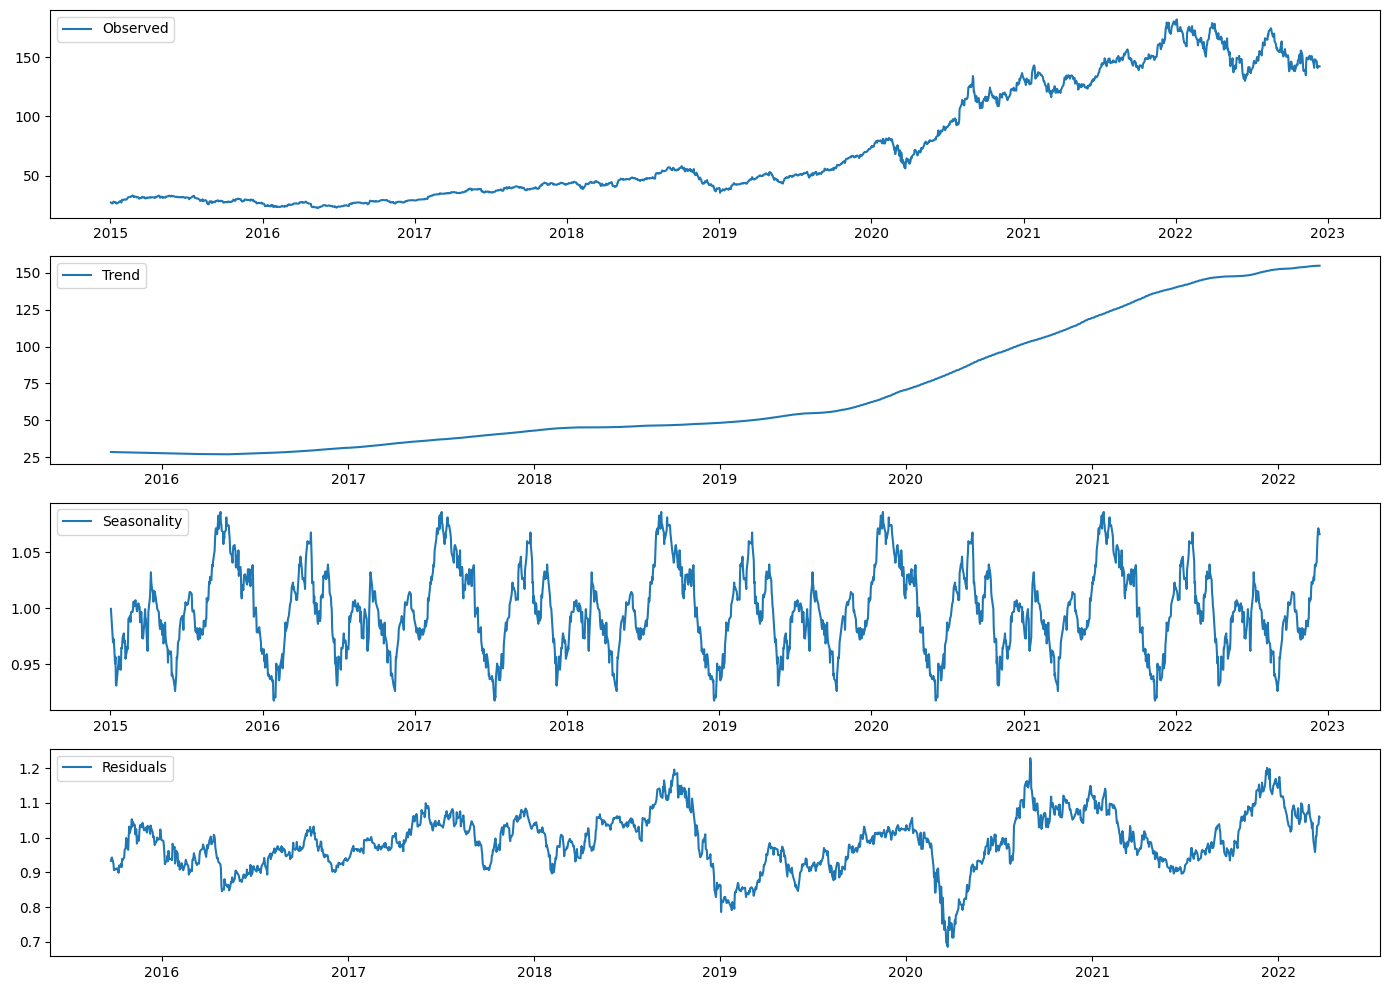


Performing EDA for AMZN...

Stock Data Insights:
Date Range: 2015-01-02 00:00:00 to 2022-12-12 00:00:00
Total Data Points: 2001
Mean Close Price: 88.31
Highest Close Price: 186.57 on 2021-07-08 00:00:00
Lowest Close Price: 14.35 on 2015-01-15 00:00:00
Volatility (Std Dev of Returns): 0.0210


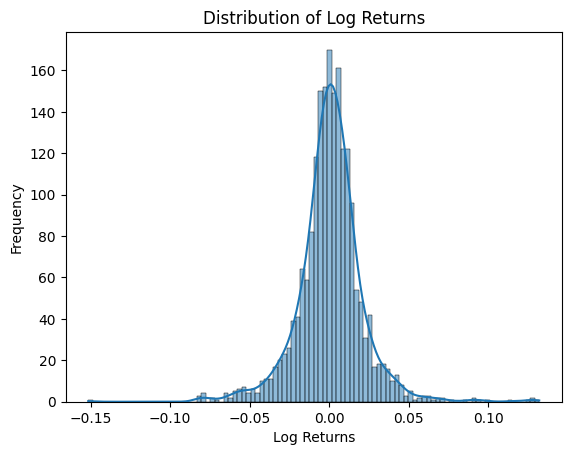

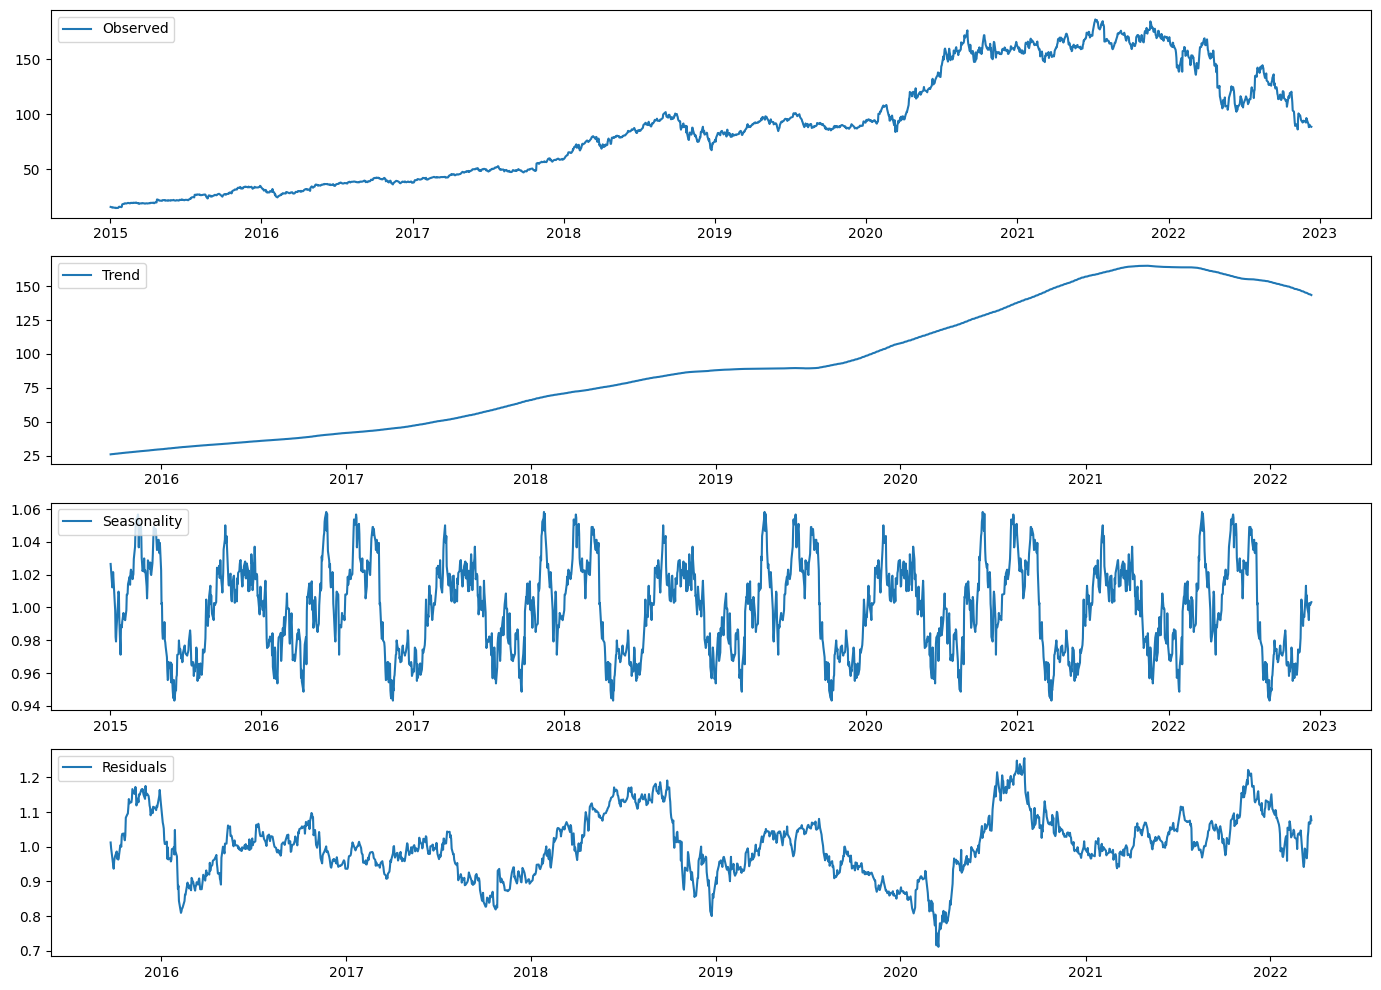


Performing EDA for IBM...

Stock Data Insights:
Date Range: 2015-01-02 00:00:00 to 2022-12-12 00:00:00
Total Data Points: 2001
Mean Close Price: 136.59
Highest Close Price: 173.95 on 2017-03-01 00:00:00
Lowest Close Price: 90.60 on 2020-03-23 00:00:00
Volatility (Std Dev of Returns): 0.0156


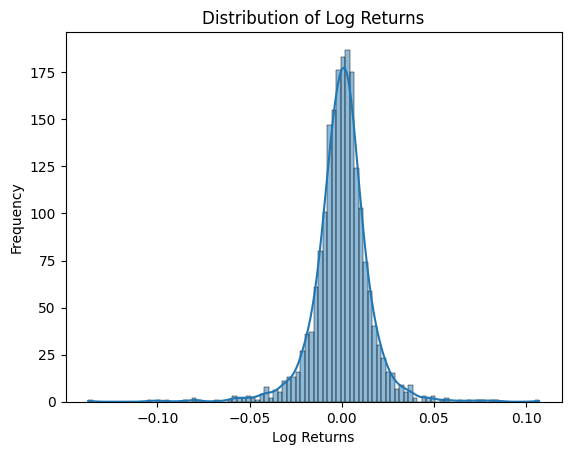

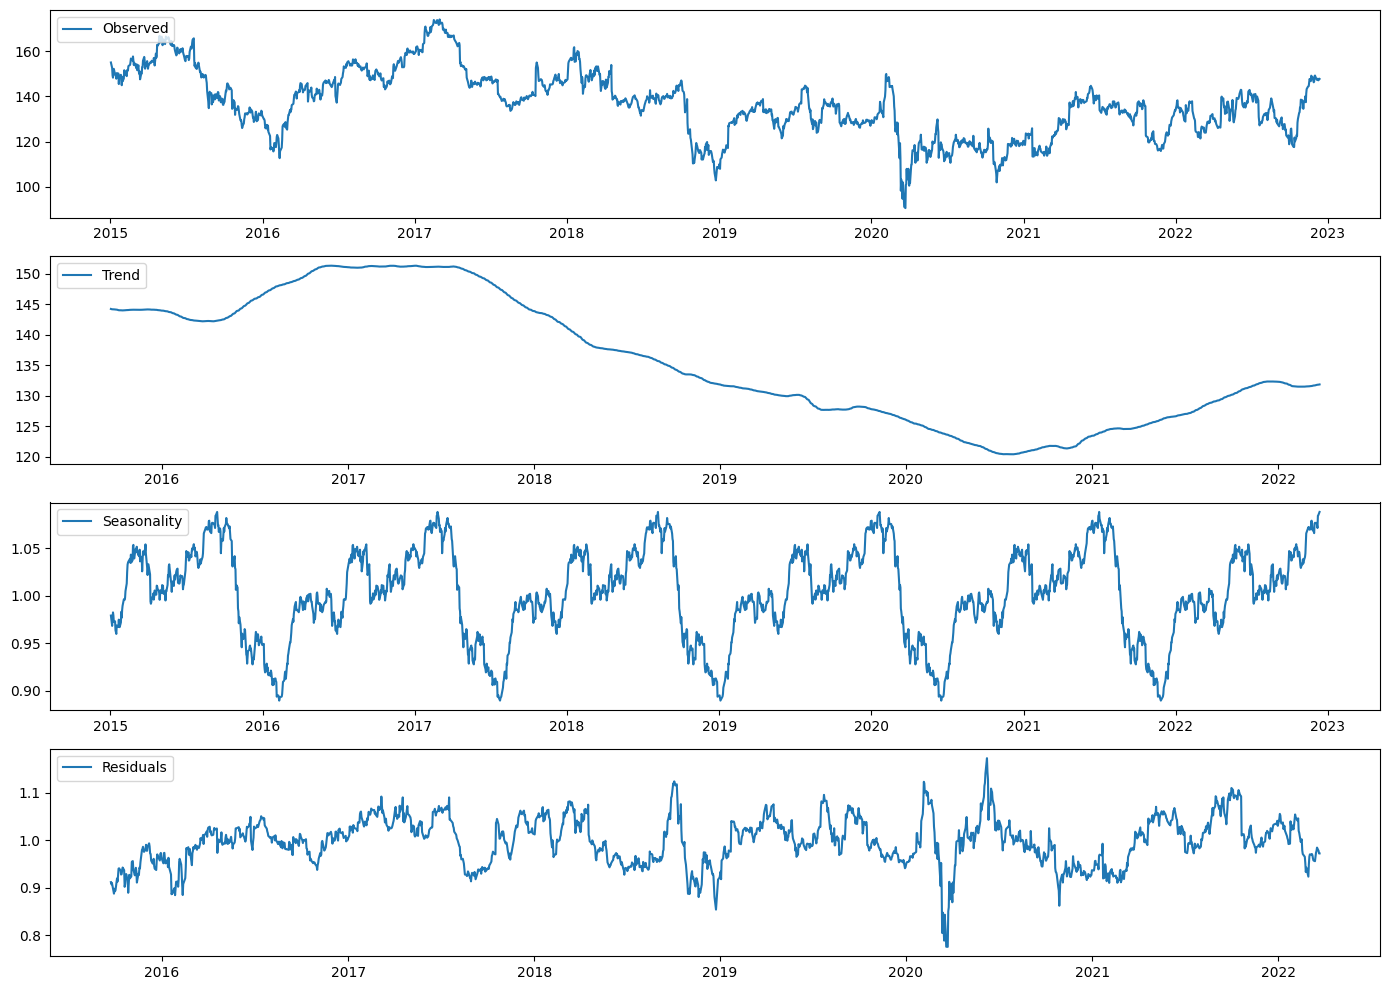

In [6]:
from eda import *

# List of stock dataframes and their corresponding tickers
stocks = [
    (df_AAPL, 'AAPL'),
    (df_AMZN, 'AMZN'),
    (df_IBM, 'IBM')
]

# Loop through each stock dataframe and ticker to perform EDA
for df, ticker in stocks:
    print(f"\nPerforming EDA for {ticker}...\n")

    # Initialize the StockAnalyzer class
    analyzer = StockAnalyzer(df)

    # Calling EDA functions for each stock
    analyzer.print_stock_insights()
    analyzer.plot_time_series_close(ticker)
    analyzer.plot_stock_price_comparison(ticker)
    analyzer.plot_log_returns_distribution()
    analyzer.plot_seasonal_decompose()
    analyzer.plot_smoothing_techniques()

### Model Train

In [11]:
! python train.py

2024-12-05 21:56:06.324803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 21:56:06.344165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 21:56:06.350039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 21:56:06.364429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 21:56:07.442709: W tensorflow/comp

### Displaying plots

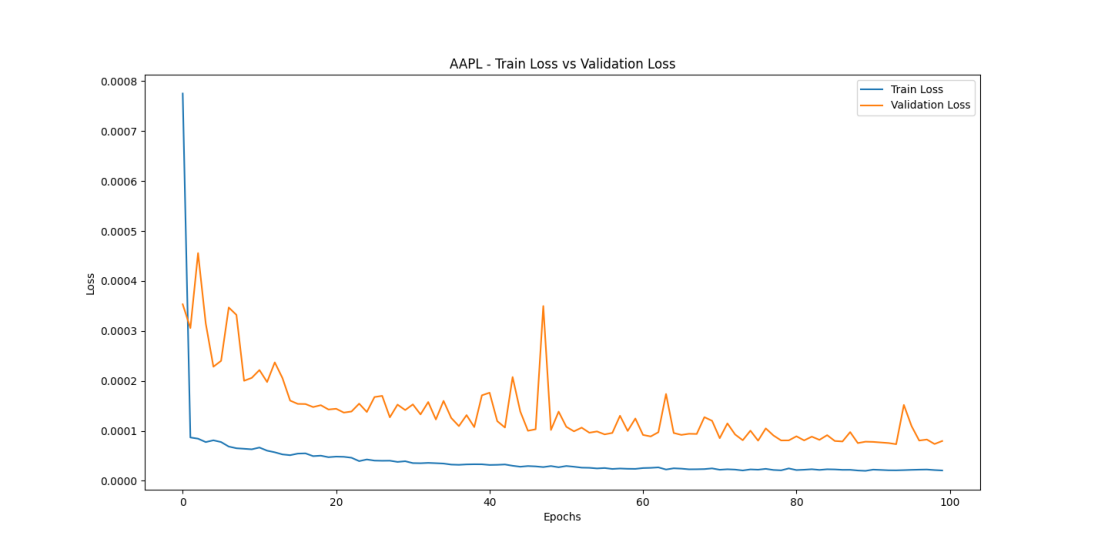

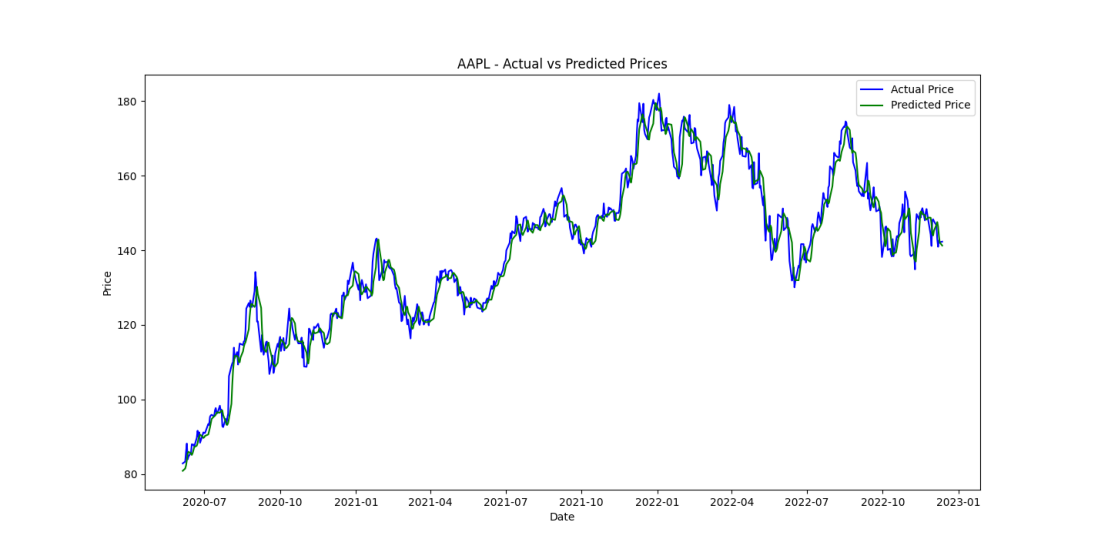

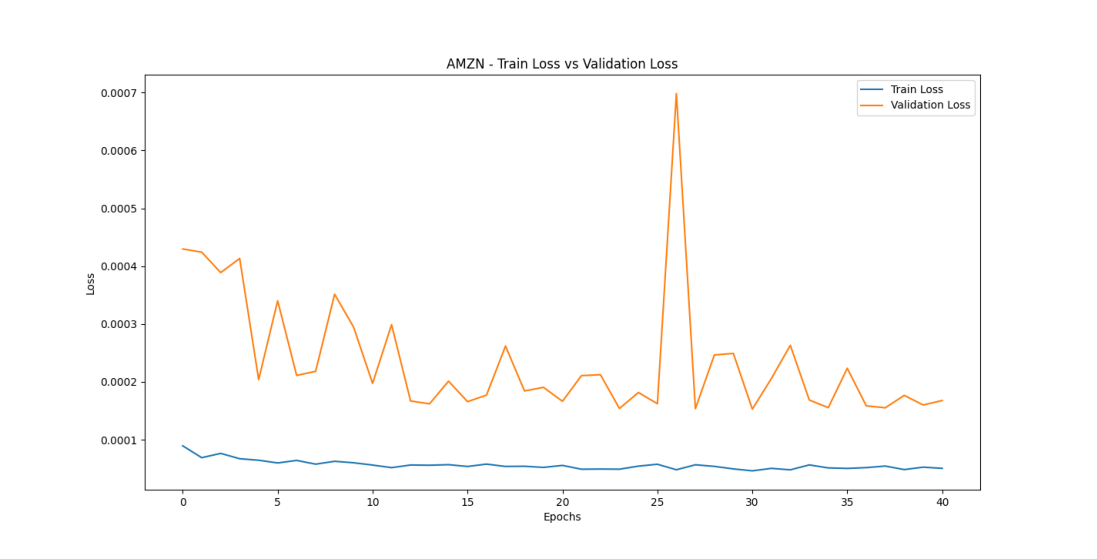

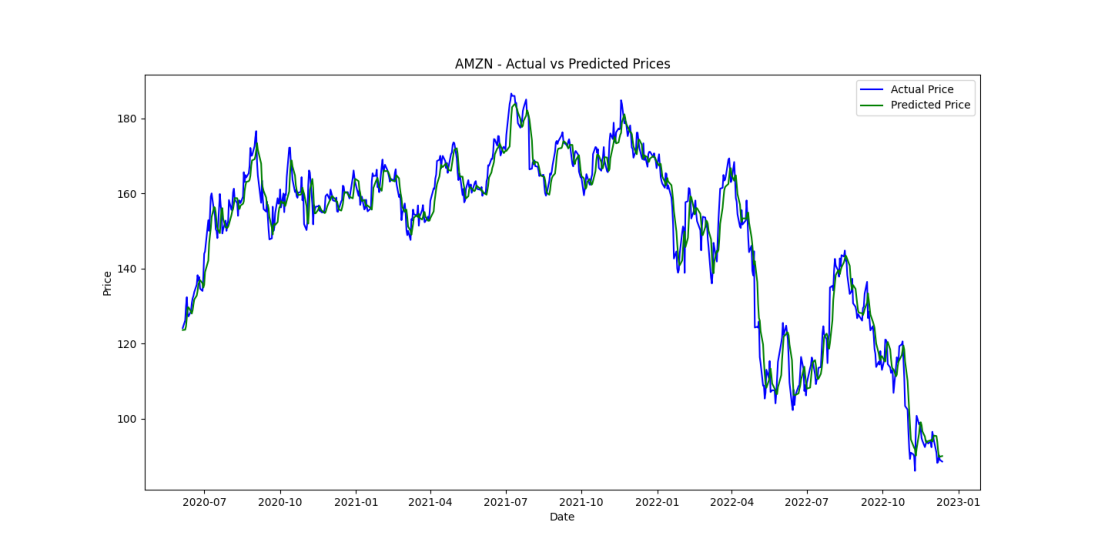

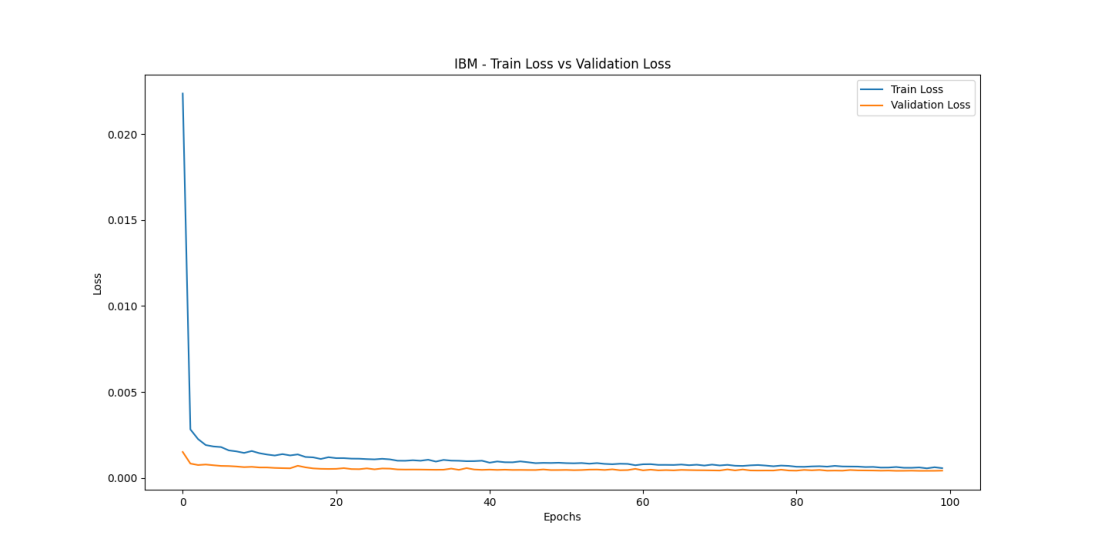

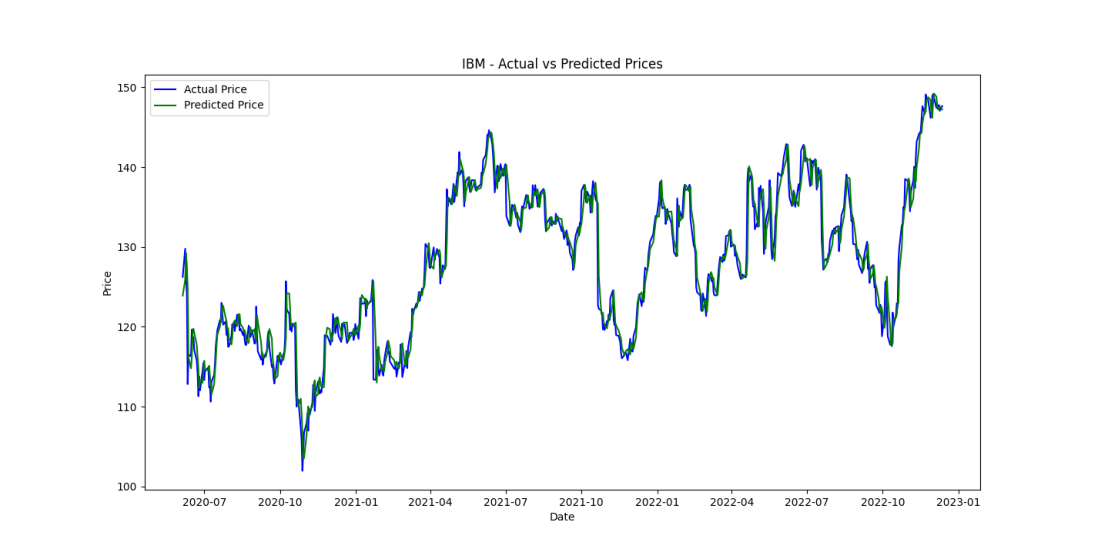

In [17]:
from display_plots import display_plot
# List of plot filenames to display
tickers = ['AAPL', 'AMZN', 'IBM']

# Display all the saved plots
for ticker in tickers:
    # Display Train Loss vs Validation Loss plot
    display_plot(f'plots/{ticker}_train_loss_vs_val_loss.png')

    # Display Actual vs Predicted Prices plot
    display_plot(f'plots/{ticker}_actual_vs_predicted_prices.png')

## Evaluation

In [16]:
! python evaluate.py

2024-12-05 22:11:28.912772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 22:11:28.932430: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 22:11:28.938412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 22:11:28.952777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 22:11:30.053977: W tensorflow/comp

## Inferencing

In [19]:
! python inference.py AAPL 10


2024-12-05 22:19:45.631261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 22:19:45.651393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 22:19:45.657709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 22:19:45.677468: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 22:19:46.734240: W tensorflow/comp

In [20]:
!zip -r project.zip . -x "*/__pycache__/*" "*/sample_data/*" -x "*/__pycache__/*" "*/sample_data/*"



  adding: .config/ (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2024.12.04/ (stored 0%)
  adding: .config/logs/2024.12.04/14.23.17.977201.log (deflated 87%)
  adding: .config/logs/2024.12.04/14.23.31.672215.log (deflated 56%)
  adding: .config/logs/2024.12.04/14.23.19.373946.log (deflated 58%)
  adding: .config/logs/2024.12.04/14.23.31.005371.log (deflated 57%)
  adding: .config/logs/2024.12.04/14.22.43.568001.log (deflated 93%)
  adding: .config/logs/2024.12.04/14.23.06.536794.log (deflated 58%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/active_config (stored 0%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding: .config/gce (stored 0%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/